In [3]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [4]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [5]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

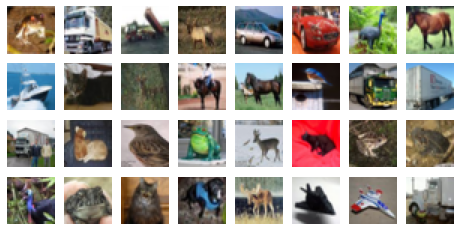

In [6]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [7]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

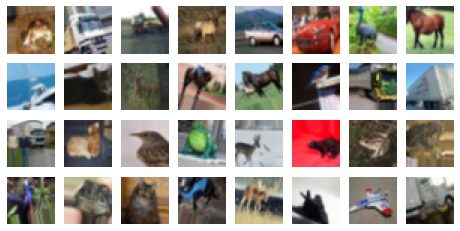

In [8]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

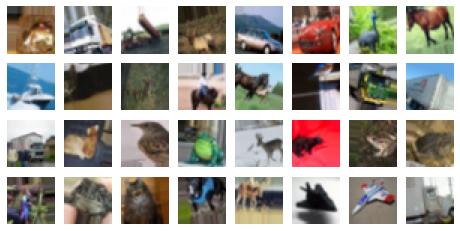

In [9]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import  cifar10 
import keras
from keras.layers import Conv2D,Activation,Dense,Dropout,Flatten,MaxPool2D
from keras import Sequential
import os
from tensorflow.python.client import device_lib

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7624946001981697914
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10608885370082621331
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4817616896
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2069525728698982525
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13238006959037689867
physical_device_desc: "device: XLA_GPU device"
]


In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
batch_size=128
num_class=10
epochs= 20

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = keras.utils.to_categorical(y_train,num_class)
y_test = keras.utils.to_categorical(y_test,num_class)

In [16]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.RMSprop(),
                metrics=['accuracy'])

data_generader = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

In [7]:
history = model.fit_generator(data_generader.flow(x_train,y_train,batch_size=batch_size),
                    steps_per_epoch= int(len(x_train)/batch_size),
                    epochs= epochs,
                    verbose =1,
                    validation_data= (x_test,y_test))


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
390/390 [==============================] - 17s 44ms/step - loss: 2.3101 - accuracy: 0.1028 - val_loss: 2.2982 - val_accuracy: 0.1129
Epoch 2/20
390/390 [==============================] - 17s 44ms/step - loss: 2.3057 - accuracy: 0.1047 - val_loss: 2.2965 - val_accuracy: 0.1292
Epoch 3/20
390/390 [==============================] - 17s 44ms/step - loss: 2.3031 - accuracy: 0.1063 - val_loss: 2.2952 - val_accuracy: 0.1258
Epoch 4/20
390/390 [==============================] - 17s 44ms/step - loss: 2.3010 - accuracy: 0.1082 - val_loss: 2.2940 - val_accuracy: 0.1219
Epoch 5/20
390/390 [==============================] - 17s 44ms/step - loss: 2.2998 - accuracy: 0.1119 - val_loss: 2.2928 - val_accuracy: 0.1209
Epoch 6/20
390/390 [==============================] - 17s 43ms/step - loss: 2.2981 - accuracy: 0.1097 - val_loss: 2.2917 - val_accuracy: 0.1188
Epoch 7/20
390/390 [==============================] - 17s 44

In [11]:
score = model.evaluate(x_test,y_test,verbose = 0 )
print('loss {},\naccuracy {}'.format(score[0],score[1]))

loss 2.2185096740722656,
accuracy 0.19599999487400055


In [12]:
no_arg = model.fit(x_train,y_train,
                    batch_size = batch_size,
                    epochs= epochs,
                    verbose= 1,
                    validation_data=(x_test,y_test))


Epoch 1/20
391/391 [==============================] - 4s 10ms/step - loss: 2.2244 - accuracy: 0.1717 - val_loss: 2.2084 - val_accuracy: 0.2058
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 2.2146 - accuracy: 0.1782 - val_loss: 2.1971 - val_accuracy: 0.2136
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 2.2056 - accuracy: 0.1829 - val_loss: 2.1847 - val_accuracy: 0.2184
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 2.1934 - accuracy: 0.1860 - val_loss: 2.1715 - val_accuracy: 0.2291
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 2.1815 - accuracy: 0.1899 - val_loss: 2.1583 - val_accuracy: 0.2429
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 2.1685 - accuracy: 0.1984 - val_loss: 2.1446 - val_accuracy: 0.2538
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 2.1583 - accuracy: 0.2000 - val_loss: 2.1311 - val_accuracy: 0.2585

In [13]:
no_arg_score=model.evaluate(x_test,y_test,verbose=0)
print('loss {}\n accuracy{}'.format(no_arg_score[0],no_arg_score[1]))

loss 2.0200204849243164
 accuracy0.27799999713897705


In [18]:
no_arg = model.fit(x_train,y_train,
                    batch_size = batch_size,
                    epochs= epochs,
                    verbose= 1,
                    validation_data=(x_test,y_test))


Epoch 1/20
391/391 [==============================] - 4s 11ms/step - loss: 0.8033 - accuracy: 0.7259 - val_loss: 0.6775 - val_accuracy: 0.7632
Epoch 2/20
391/391 [==============================] - 4s 11ms/step - loss: 0.7649 - accuracy: 0.7380 - val_loss: 0.8122 - val_accuracy: 0.7236
Epoch 3/20
391/391 [==============================] - 4s 11ms/step - loss: 0.7441 - accuracy: 0.7478 - val_loss: 0.8245 - val_accuracy: 0.7406
Epoch 4/20
391/391 [==============================] - 4s 11ms/step - loss: 0.7176 - accuracy: 0.7569 - val_loss: 0.7128 - val_accuracy: 0.7655
Epoch 5/20
391/391 [==============================] - 4s 11ms/step - loss: 0.7073 - accuracy: 0.7610 - val_loss: 0.9178 - val_accuracy: 0.7068
Epoch 6/20
391/391 [==============================] - 4s 11ms/step - loss: 0.7024 - accuracy: 0.7642 - val_loss: 0.6661 - val_accuracy: 0.7790
Epoch 7/20
391/391 [==============================] - 4s 11ms/step - loss: 0.6879 - accuracy: 0.7693 - val_loss: 0.7553 - val_accuracy: 0.7718

In [17]:
history = model.fit_generator(data_generader.flow(x_train,y_train,batch_size=batch_size),
                    steps_per_epoch= int(len(x_train)/batch_size),
                    epochs= epochs,
                    verbose =1,
                    validation_data= (x_test,y_test))

Epoch 1/20
390/390 [==============================] - 17s 44ms/step - loss: 1.9110 - accuracy: 0.3000 - val_loss: 1.4623 - val_accuracy: 0.4784
Epoch 2/20
390/390 [==============================] - 17s 44ms/step - loss: 1.6101 - accuracy: 0.4154 - val_loss: 1.3238 - val_accuracy: 0.5237
Epoch 3/20
390/390 [==============================] - 17s 44ms/step - loss: 1.4635 - accuracy: 0.4687 - val_loss: 1.2342 - val_accuracy: 0.5560
Epoch 4/20
390/390 [==============================] - 17s 44ms/step - loss: 1.3699 - accuracy: 0.5084 - val_loss: 1.1932 - val_accuracy: 0.5724
Epoch 5/20
390/390 [==============================] - 17s 44ms/step - loss: 1.3030 - accuracy: 0.5348 - val_loss: 1.0607 - val_accuracy: 0.6206
Epoch 6/20
390/390 [==============================] - 17s 44ms/step - loss: 1.2416 - accuracy: 0.5596 - val_loss: 1.0293 - val_accuracy: 0.6294
Epoch 7/20
390/390 [==============================] - 18s 46ms/step - loss: 1.2116 - accuracy: 0.5727 - val_loss: 1.2108 - val_accuracy: